In [ ]:
import psutil
import time

# Get CPU usage
cpu_usage = psutil.cpu_percent(interval=1)
print(f"CPU Usage: {cpu_usage}%")

# Get memory usage
memory_info = psutil.virtual_memory()
print(f"Total Memory: {memory_info.total / (1024 ** 3):.2f} GB")
print(f"Available Memory: {memory_info.available / (1024 ** 3):.2f} GB")
print(f"Used Memory: {memory_info.used / (1024 ** 3):.2f} GB")
print(f"Memory Usage: {memory_info.percent}%")


CPU Usage: 0.0%
Total Memory: 125.60 GB
Available Memory: 120.56 GB
Used Memory: 3.83 GB
Memory Usage: 4.0%


In [ ]:
import re
import numpy as np
from snorkel.labeling import labeling_function
import json
def check_usage(text, word, param='VERB'):
    # Split the text into words
    words = text.lower().split()

    # Search for the word and check its part of speech
    for w in words:
        if w == word.lower():
            # Assume the word is a verb if not specified
            pos = 'VERB' if param is None else param

            # Check if the word is of the specified part of speech
            if pos == 'VERB':
                return True
    return False


def lf_pattern1(x):
    pattern = 'slow.*fast'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) and 'performance' in commit_message else -1


def lf_pattern2(x):
    pattern = 'speed.*up'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) and 'perf' in commit_message  else -1


def lf_pattern3(x):
    pattern = r'vector.*improve|vector.*improves|vector.*improving|vector.*improved|vectorize.*improve|vectorize.*improves|vectorize.*improving|vectorize.*improved|vectorzing.*improve|vectorzing.*improves|vectorzing.*improving|vectorzing.*improved|vectorized.*improve|vectorized.*improves|vectorized.*improving|vectorized.*improved'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) and 'performance' in commit_message else -1


def lf_pattern4(x):
    pattern = r'fast.*memory|faster.*memory'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) and 'perf' in commit_message else -1


def lf_pattern5(x): # removed for now
    pattern = r'universal.*intrinsics|universal.*intrinsics'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) else -1
def lf_pattern6(x):
    pattern = r'(?<=[ ,.])(backend .*performance)(?=[ ,.])|(backend .*performances)(?=[ ,.])'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern8(x):
    pattern = r'(?<=[ ,.])performance .*(benefit|gain|increas|hit)'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern9(x):
    pattern1 = r'(?<=[ ,.])more .*efficien'
    pattern2 = r'(?<=[ ,.])(performance|optimize|optimizes|optimized|optimization|optimizations|speed.*up|efficien|faster|benefit|gain|increas|hit|solution|patch|code)'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern1, commit_message) and re.search(pattern2, commit_message) else -1
    return -1

def lf_pattern10(x):
    pattern = r'(?<=[ ,.])performance .*bug'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) and 'increas' in commit_message else -1
    return -1

def lf_pattern7(x):
    pattern = 'speedup.*added|speedups.*added|speed-up.*added'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) else -1

def lf_pattern13(x):
    pattern = r'patch.*improve|patch.*improves|patch.*improving|patch.*improved'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) else -1
def lf_pattern14(x):
    pattern = r'accelerat'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) else -1

def lf_pattern19(x):
    pattern = r'(\d+)% fast'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) else -1

def lf_pattern20(x):
    pattern = r'(\d+)x faster'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) else -1
def lf_pattern31(x):
    pattern = r'(?<=[ ,.])increas.*performance(?=[ ,.])'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) else -1
def lf_pattern32(x):
    pattern = r'reduc.*overhead'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) else -1

def lf_pattern33(x):
    pattern = r' optimiz'
    commit_message = x.replace('\n', ' ').lower()
    if 'optimized' in commit_message and not check_usage(commit_message, 'optimized'):
        return -1
    else:
        return 1 if re.search(pattern, commit_message) and 'performance' in commit_message and 'optimizer' not in commit_message else -1

def lf_pattern36(x):
    pattern = r'memory.*optimiz'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) else -1

def lf_pattern37(x):
    pattern = r'avoid.*overhead|reduce.*overhead'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) else -1

def lf_pattern41(x):
    pattern = r'faster'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) and 'performance' in commit_message else -1

def lf_pattern44(x):
    text = x.replace('\n', ' ').lower()
    if "memory" in text and "leak" in text and "performance" in text:
        return 1
    return -1


def lf_pattern11(x):
    pattern = r'(?<=[ ,.])(large .*performance)(?=[ ,.])|(large .*performances)(?=[ ,.])'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern12(x):
    pattern = r'(?<=[ ,.])better .*performance(?=[ ,.])|better .*performances(?=[ ,.])'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern15(x):
    pattern = r'(?<=[ ,.])(fixed .*performance)|(fixed .*performances)(?=[ ,.])'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) and 'improv' in commit_message else -1
    return -1

def lf_pattern16(x):
    pattern = r'(?<=[ ,.])improv.*performance(?=[ ,.])'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern17(x):
    pattern = r'(?<=[ ,.])(optimize .*performance)(?=[ ,.])|(optimize .*performances)(?=[ ,.])|(optimizes .*performance)(?=[ ,.])|(optimizes .*performances)(?=[ ,.])|(optimized .*performance)(?=[ ,.])|(optimized .*performances)(?=[ ,.])|(optimizing .*performance)(?=[ ,.])|(optimizing .*performances)(?=[ ,.])'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern35(x):
    pattern = r'(?<=[ ,.])inefficien'
    pattern2 = r'(?<=[ ,.])(performance|(optimize(?=[ ,.])|optimizes(?=[ ,.])|optimized(?=[ ,.])|optimization(?=[ ,.])|optimizations(?=[ ,.]))|speed .* up|efficien|faster)'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) and re.search(pattern2, commit_message) else -1
    return -1

def lf_pattern38(x):
    pattern = r'(?<=[ ,.])performance .*enhanc'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern39(x):
    pattern = r'(?<=[ ,.])performance .*gain'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern40(x):
    pattern = r'(?<=[ ,.])performance .*benefit'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern52(x):
    pattern = r'(?<=[ ,.])performance fix'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern53(x):
    pattern = r'(?<=[ ,.])performance .*(optimize(?=[ ,.])|optimizes(?=[ ,.])|optimized(?=[ ,.])|optimization(?=[ ,.])|optimizations(?=[ ,.]))'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern54(x):
    pattern = r'(?<=[ ,.])performance .*inefficien'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern55(x):
    pattern = r'(?<=[ ,.])performance .*bottleneck'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern56(x):
    pattern = r'(?<=[ ,.])performance .*hit'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern57(x):
    pattern = r'(?<=[ ,.])performance .*(increas|throughput)'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern58(x):
    pattern = r'(?<=[ ,.])performance .*regression(?=[ ,.])'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) and 'fix' in commit_message else -1
    return -1

def lf_pattern60(x):
    pattern = r'(?<=[ ,.])performance .*gain'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern64(x):
    pattern_nperf = r'(?<=[ ,.])patch'
    pattern_perf = r'(?<=[ ,.])(performance|optimiz|speed .* up|efficien|faster)'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern_nperf, commit_message) and re.search(pattern_perf, commit_message) else -1
    return -1

def lf_pattern65(x):
    pattern = r'(?<=[ ,.])performance .*((issue)|(problem)|(regression))'
    commit_message = x.replace('\n', ' ').lower()
    if 'performance test' not in commit_message:
        return 1 if re.search(pattern, commit_message) else -1
    return -1

def lf_pattern42(x):
    pattern = r'performance.*improve|performance.*improves|performance.*improving|performance.*improved|performance.*improvement'
    commit_message = x.replace('\n', ' ').lower()
    return 1 if re.search(pattern, commit_message) else -1

In [ ]:
import pandas as pd
import time
final_gold_label=pd.read_csv('Revised_final_gold_label.csv')

In [ ]:
final_gold_label

,idx,commit_message,target,pred_roberta,Roberta_prediction
0,63,fix for removing unnecessary cpu usage by infi...,1,2.0,1.0
1,82,don't use -dbcache for bdb anymore -dbcache wa...,1,2.0,1.0
2,106,drop vaddrtosend after sending big addr messag...,1,2.0,1.0
3,2125,mdev-19586: remove unnecessary iteration recv_...,1,2.0,1.0
4,2945,* sort draw calls with the new forcefield shad...,1,2.0,1.0
...,...,...,...,...,...
495,844,Merge pull request #392 from algolia/frontend_...,0,NaN,NaN
496,442,Improved auto-completion Now you can press ta...,0,NaN,NaN
497,503,Improve math/linalg to support both f32 and f6...,0,NaN,NaN
498,206,Added stack testing program pushpop.s Added ch...,0,NaN,NaN


In [ ]:
import os
os.getcwd()

'/home/manojale/Documents/Performance_Dataset'

In [ ]:
import pandas as pd
extra=pd.read_json('/home/manojale/Documents/Data/azad_train.jsonl',lines=True) # share

In [ ]:
new=pd.concat([final_gold_label,extra[extra['target']==0].sample(7)])

In [ ]:
new.to_csv('Revised_final_gold_label.csv',index=False)

In [ ]:
lf_functions = {
    'lf_pattern1': lf_pattern1,
    'lf_pattern2': lf_pattern2,
    'lf_pattern3': lf_pattern3,
    'lf_pattern4': lf_pattern4,
    'lf_pattern5':lf_pattern5,
    'lf_pattern6': lf_pattern6,
    'lf_pattern7': lf_pattern7,
    'lf_pattern8': lf_pattern8,
    'lf_pattern9': lf_pattern9,
    'lf_pattern10': lf_pattern10,
    'lf_pattern11': lf_pattern11,
    'lf_pattern12': lf_pattern12,
    'lf_pattern13': lf_pattern13,
    'lf_pattern14': lf_pattern14,
    'lf_pattern15': lf_pattern15,
    'lf_pattern16': lf_pattern16,
    'lf_pattern17': lf_pattern17,
    'lf_pattern19': lf_pattern19,
    'lf_pattern20': lf_pattern20,
    'lf_pattern31': lf_pattern31,
    'lf_pattern32': lf_pattern32,
    'lf_pattern33': lf_pattern33,
    'lf_pattern35': lf_pattern35,
    'lf_pattern36': lf_pattern36,
    'lf_pattern37': lf_pattern37,
    'lf_pattern38': lf_pattern38,
    'lf_pattern39': lf_pattern39,
    'lf_pattern40': lf_pattern40,
    'lf_pattern41': lf_pattern41,
    'lf_pattern42': lf_pattern42,
    'lf_pattern44': lf_pattern44,
    'lf_pattern52': lf_pattern52,
    'lf_pattern53': lf_pattern53,
    'lf_pattern54': lf_pattern54,
    'lf_pattern55': lf_pattern55,
    'lf_pattern56': lf_pattern56,
    'lf_pattern57': lf_pattern57,
    'lf_pattern58': lf_pattern58,
    'lf_pattern60': lf_pattern60,
    'lf_pattern64': lf_pattern64,
    'lf_pattern65': lf_pattern65,
}
start_time=time.time()
# Apply labeling functions and create a filter column
for name, lf in lf_functions.items():
    final_gold_label[name] = final_gold_label['commit_message'].apply(lf)

# Create a single column to summarize results
final_gold_label['label'] = final_gold_label[list(lf_functions.keys())].apply(lambda row: 1 if (row == 1).any() else -1, axis=1)

# Drop individual labeling function columns
final_gold_label = final_gold_label[['commit_message', 'label','target']]
end_time= time.time()
# Show the DataFrame with the summarized column
print(final_gold_label)

                                        commit_message  label  target
0    fix for removing unnecessary cpu usage by infi...     -1       1
1    don't use -dbcache for bdb anymore -dbcache wa...     -1       1
2    drop vaddrtosend after sending big addr messag...     -1       1
3    mdev-19586: remove unnecessary iteration recv_...     -1       1
4    * sort draw calls with the new forcefield shad...     -1       1
..                                                 ...    ...     ...
495  Merge pull request #392 from algolia/frontend_...     -1       0
496  Improved auto-completion  Now you can press ta...     -1       0
497  Improve math/linalg to support both f32 and f6...     -1       0
498  Added stack testing program pushpop.s Added ch...     -1       0
499  Add support for XFAILing valgrind runs with me...     -1       0

[500 rows x 3 columns]


In [ ]:
end_time-start_time

0.20471405982971191

In [ ]:
!nvidia-smi

Mon May 27 12:42:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.171.04             Driver Version: 535.171.04   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 4090        Off | 00000000:41:00.0 Off |                  Off |
|  0%   34C    P8              34W / 480W |     11MiB / 24564MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import psutil
import time

# Get CPU usage
cpu_usage = psutil.cpu_percent(interval=1)
print(f"CPU Usage: {cpu_usage}%")

# Get memory usage
memory_info = psutil.virtual_memory()
print(f"Total Memory: {memory_info.total / (1024 ** 3):.2f} GB")
print(f"Available Memory: {memory_info.available / (1024 ** 3):.2f} GB")
print(f"Used Memory: {memory_info.used / (1024 ** 3):.2f} GB")
print(f"Memory Usage: {memory_info.percent}%")


CPU Usage: 0.1%
Total Memory: 125.60 GB
Available Memory: 120.56 GB
Used Memory: 3.84 GB
Memory Usage: 4.0%


In [ ]:
final_gold_label['label'].value_counts()

-1    342
 1    158
Name: label, dtype: int64

In [ ]:
final_gold_label.loc[final_gold_label['label']==-1, 'label']=0

/usr/lib/python3/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


{'0': {'precision': 0.631578947368421, 'recall': 0.84375, 'f1-score': 0.7224080267558528, 'support': 256}, '1': {'precision': 0.7468354430379747, 'recall': 0.48360655737704916, 'f1-score': 0.5870646766169154, 'support': 244}, 'accuracy': 0.668, 'macro avg': {'precision': 0.6892071952031978, 'recall': 0.6636782786885246, 'f1-score': 0.6547363516863841, 'support': 500}, 'weighted avg': {'precision': 0.6878241172551631, 'recall': 0.668, 'f1-score': 0.6563604718880512, 'support': 500}}


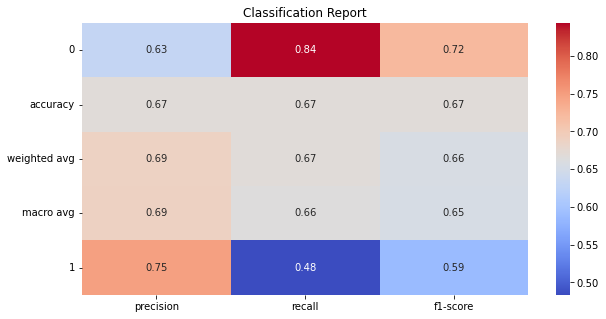

False Positives: 40
False Negatives: 126


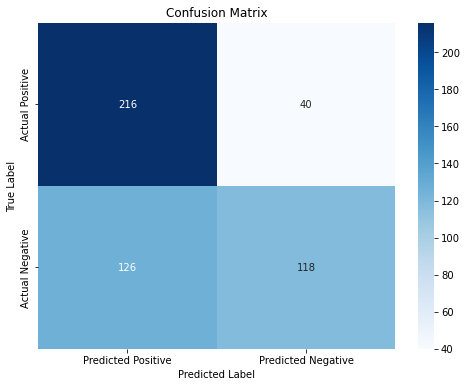

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

y_true= final_gold_label['target']
y_pred=final_gold_label['label']

# Generate the classification report
report = classification_report(y_true, y_pred,output_dict=True)

# Print the classification report
print(report)

df1 = pd.DataFrame(report).transpose()
df1 = df1.sort_values(by=['f1-score'], ascending=False)

# Plot the classification report
plt.figure(figsize=(10, 5))
sns.heatmap(df1[['precision', 'recall', 'f1-score']], annot=True, cmap='coolwarm')
plt.title('Classification Report')
plt.show()
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

# Extract true positives (TP), false positives (FP), false negatives (FN), and true negatives (TN)
tn, fp, fn, tp = cm.ravel()

# Calculate false positives and false negatives
false_positive = fp
false_negative = fn

print("False Positives:", false_positive)
print("False Negatives:", false_negative)
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Positive', 'Predicted Negative'], yticklabels=['Actual Positive', 'Actual Negative'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

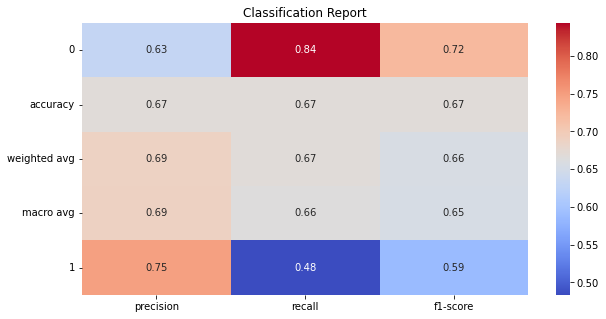

              precision    recall  f1-score  support       FPR  accuracy
0              0.631579  0.843750  0.722408  256.000  0.516393       NaN
accuracy       0.668000  0.668000  0.668000    0.668       NaN       NaN
weighted avg   0.687824  0.668000  0.656360  500.000       NaN       NaN
macro avg      0.689207  0.663678  0.654736  500.000       NaN       NaN
1              0.746835  0.483607  0.587065  244.000  0.156250       NaN


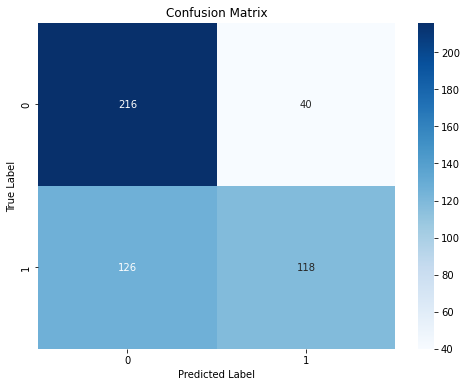

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np

y_true = final_gold_label['target']
y_pred = final_gold_label['label']

# Generate the classification report
report = classification_report(y_true, y_pred, output_dict=True)

# Convert the report to a DataFrame and sort by f1-score
df1 = pd.DataFrame(report).transpose()
df1 = df1.sort_values(by=['f1-score'], ascending=False)

# Plot the classification report
plt.figure(figsize=(10, 5))
sns.heatmap(df1[['precision', 'recall', 'f1-score']], annot=True, cmap='coolwarm')
plt.title('Classification Report')
plt.show()

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))

# Calculate FPR and accuracy for each class
fpr = {}
accuracy = {}
for i, label in enumerate(np.unique(y_true)):
    fp = cm[:, i].sum() - cm[i, i]
    tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
    if (fp + tn) != 0:
        fpr[str(label)] = fp / (fp + tn)
    else:
        fpr[label] = 0.0  # or handle this case as needed
    tp = cm[i, i]
    fn = cm[i, :].sum() - tp
    accuracy[label] = (tp + tn) / cm.sum()

# Add FPR and accuracy to the DataFrame
df1['FPR'] = df1.index.map(fpr)
df1['accuracy'] = df1.index.map(accuracy)

# Print the updated DataFrame
print(df1)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
df1.to_csv("keyword_based_answer.csv",index=False)